<a href="https://colab.research.google.com/github/ppprakharr/RegressionModels/blob/main/MarketSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

Taking the training and test csv and making it as a dataframe and concatinating

In [98]:
train = pd.read_csv('/content/Train.csv')
test = pd.read_csv('/content/Test.csv')

In [99]:
train.shape

(8523, 12)

In [100]:
test.shape

(5681, 11)

In [101]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [102]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [103]:
market_data = pd.concat([train,test],axis=0)

In [104]:
market_data.shape

(14204, 12)

In [105]:
market_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [106]:
market_data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [107]:
 market_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Preprocessing

In [108]:
# check for null values
market_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# handle missing value

Mean -->average

Mode --> Most repeated value

In [109]:
# mean value of item weight column
mean1 = market_data['Item_Weight'].mean()

In [110]:
# filling the missing values in Item weight column which are NAN with mean value
market_data['Item_Weight'].fillna(mean1, inplace=True)

In [111]:
# mean value of Item_outlet_sales
mean2 = market_data['Item_Outlet_Sales'].mean()
print(mean2)

2181.288913575032


In [112]:
market_data['Item_Outlet_Sales'].fillna(mean2,inplace=True)

In [113]:
market_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [114]:
# replacing the missing value in outlet_size
mode_of_outlet_size = market_data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [115]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [116]:
missing_values = market_data['Outlet_Size'].isnull()
market_data.loc[missing_values,'Outlet_Size'] = market_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [117]:
market_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DATA ANALYSIS

In [118]:
market_data['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [119]:
market_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1321.864430
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,2181.288914
75%,16.000000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Plotting the numerical feature

In [120]:
sns.set()

<ipython-input-121-8d1786f1133b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data['Item_Weight'])


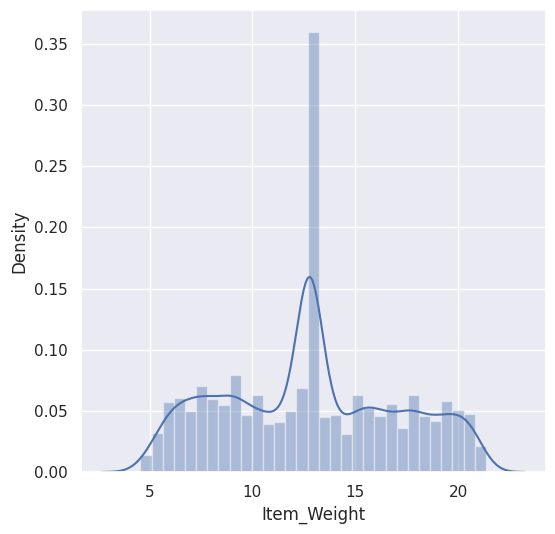

In [121]:
#Item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(market_data['Item_Weight'])
plt.show()

<ipython-input-122-060a76d57ed2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data['Item_Visibility'])


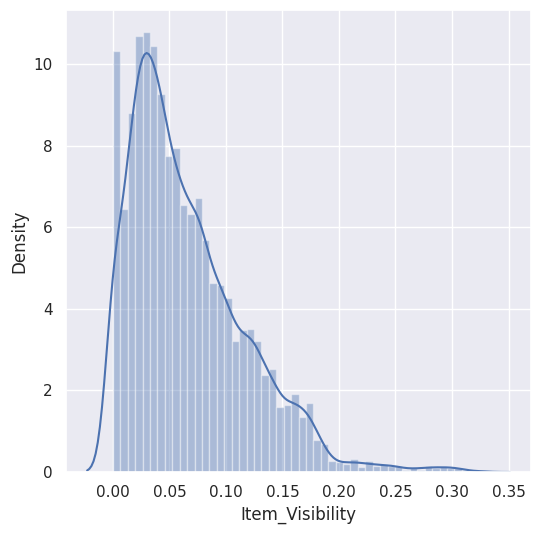

In [122]:
#Item visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(market_data['Item_Visibility'])
plt.show()

<ipython-input-123-b19336cd0811>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data['Item_MRP'])


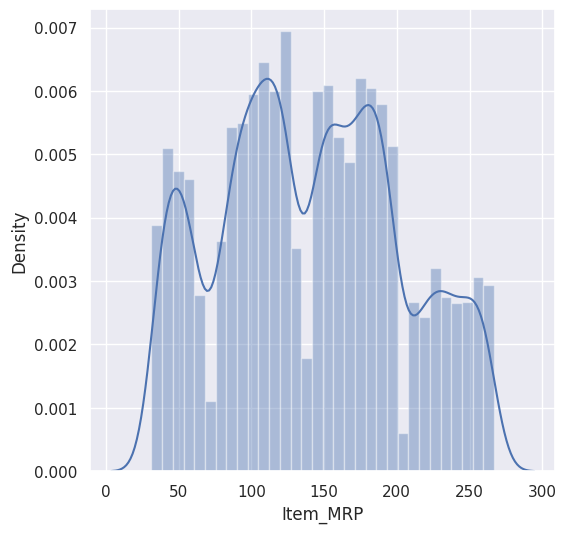

In [123]:
# Item mrp distribution
#Item weight distribution
plt.figure(figsize=(6,6))
sns.distplot(market_data['Item_MRP'])
plt.show()

<ipython-input-124-c5a71d455244>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_data['Item_Outlet_Sales'])


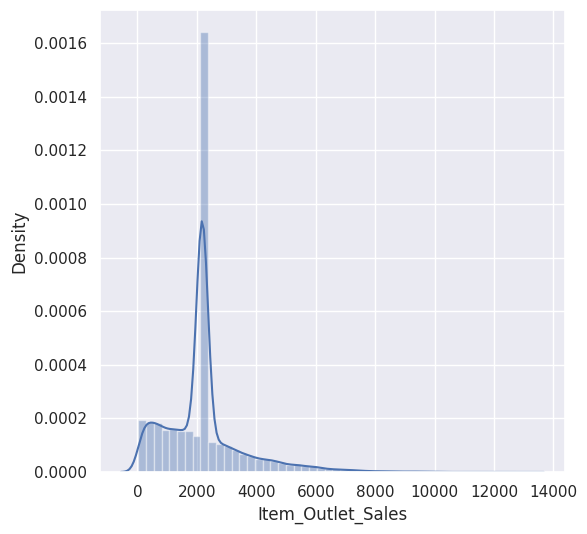

In [124]:
#Item outlet sales distribution
plt.figure(figsize=(6,6))
sns.distplot(market_data['Item_Outlet_Sales'])
plt.show()

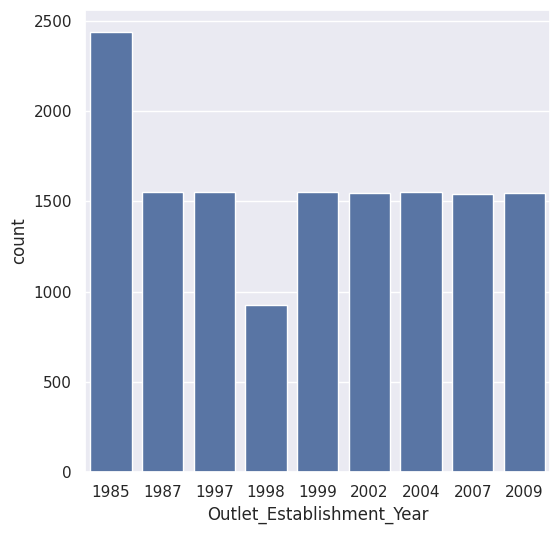

In [125]:
# outlet_establishment year

plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=market_data)
plt.show()

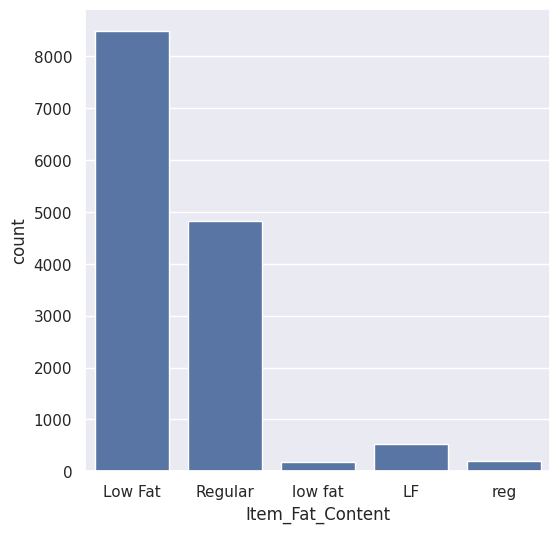

In [126]:
# item_fat_content

plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=market_data)
plt.show()

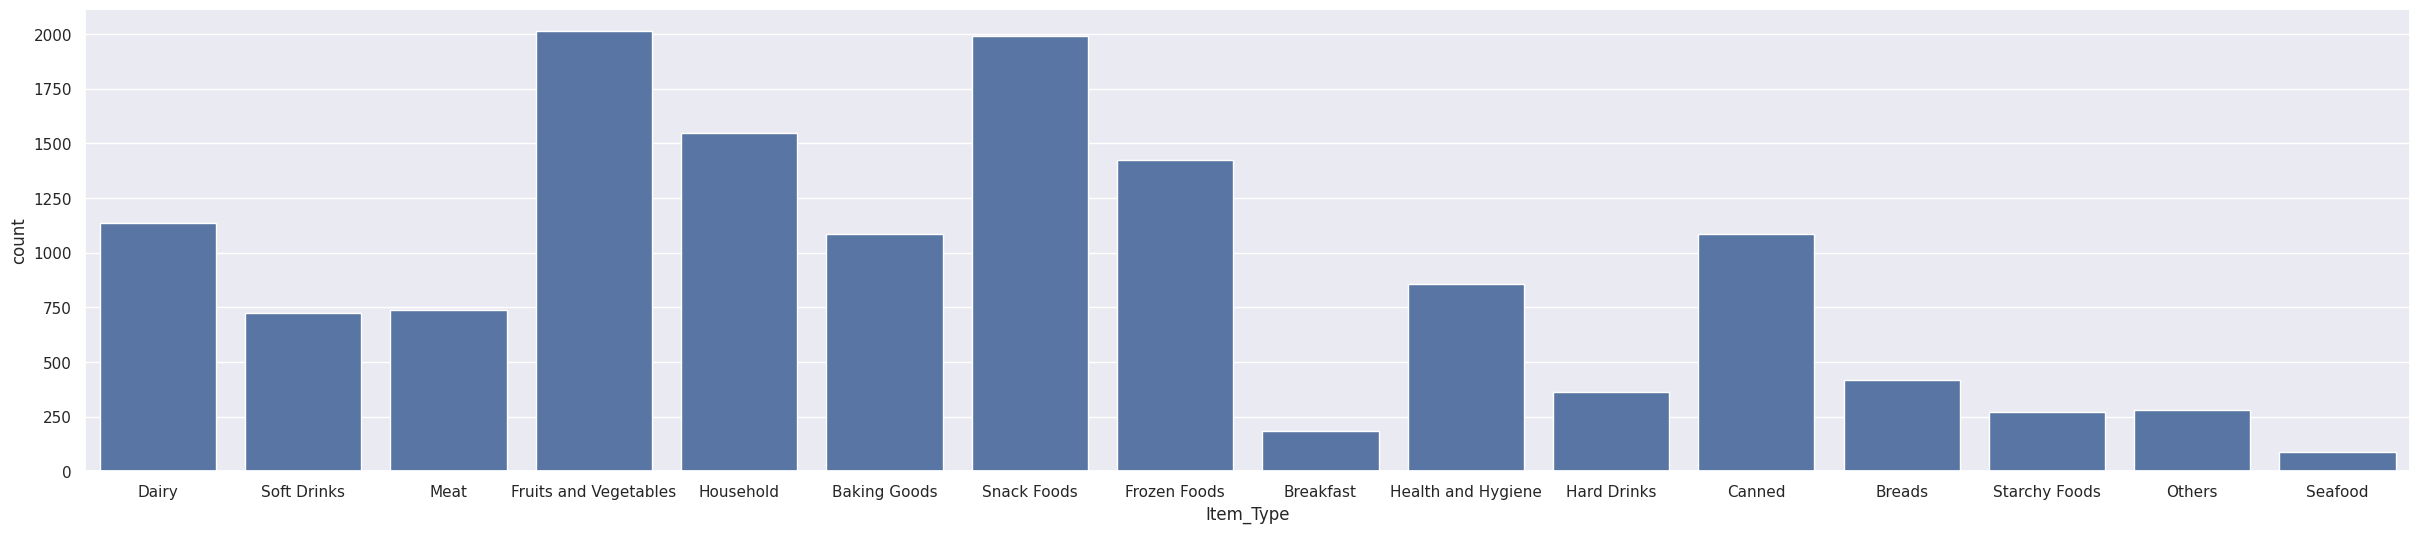

In [127]:
# item_type

plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=market_data)
plt.show()

# Label Encoding the Data

In [128]:
market_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [56]:
market_data.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}},inplace=True)

In [57]:
market_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Taking all the categorical value and converting it to number

In [129]:
encoder = LabelEncoder()


In [130]:
market_data['Item_Identifier']=encoder.fit_transform(market_data['Item_Identifier'])
market_data['Item_Fat_Content']=encoder.fit_transform(market_data['Item_Fat_Content'])
market_data['Item_Type']=encoder.fit_transform(market_data['Item_Type'])
market_data['Outlet_Identifier']=encoder.fit_transform(market_data['Outlet_Identifier'])
market_data['Outlet_Size']=encoder.fit_transform(market_data['Outlet_Size'])
market_data['Outlet_Location_Type']=encoder.fit_transform(market_data['Outlet_Location_Type'])
market_data['Outlet_Type']=encoder.fit_transform(market_data['Outlet_Type'])

#Splitting the label and dataset

In [131]:
x=market_data.drop(columns = ['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=market_data['Item_Outlet_Sales']
print(x)
print(y)

      Item_Weight  Item_Fat_Content  ...  Outlet_Location_Type  Outlet_Type
0            9.30                 1  ...                     0            1
1            5.92                 2  ...                     2            2
2           17.50                 1  ...                     0            1
3           19.20                 2  ...                     2            0
4            8.93                 1  ...                     2            1
...           ...               ...  ...                   ...          ...
5676        10.50                 2  ...                     0            1
5677         7.60                 2  ...                     2            2
5678        10.00                 1  ...                     1            1
5679        15.30                 2  ...                     1            1
5680         9.50                 2  ...                     1            1

[14204 rows x 9 columns]
0       3735.138000
1        443.422800
2       2097.270000
3 

#Splitting training and test data and model training

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [161]:
print(x.shape,x_train.shape,x_test.shape)

(14204, 9) (9942, 9) (4262, 9)


In [162]:
model = XGBRegressor()

In [166]:
# training the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [167]:
# evaluating the training data
train_data_check = model.predict(x_train)
score = metrics.r2_score(y_train, train_data_check)
print("r2_score on training: ",score)

r2_score on training:  0.718570537064459


In [168]:
# evaluating the testing data
test_data_check = model.predict(x_test)
score = metrics.r2_score(y_test, test_data_check)
print("r2_score on testing: ",score)

r2_score on testing:  0.2266652082621362


#Evaluating the system

In [ ]:
input_data=()
input_as_array=np.asarray(input_data)
input_reshape = input_as_array.reshape(1,-1)
pred = model.predict(input_reshape)